Project Name: **Predict Bike Sharing Demand (ML_Regression)**

Presented by: **M Hussain**

Goal: **Predict The number of bikes rented based on weather, time etc.**

Data: **Feb 01,025**

**Dataset Overview:**

This dataset tracks bike rentals in a bike-sharing system, including weather, time, and user data. The goal is to predict the total number of bikes rented (cnt) using features like temperature, humidity, and weather conditions.

----------------------------------------------------------

**Dataset Breakdown:**

dteday: The date of the rental data.

season: The season (1: Winter, 2: Spring, 3: Summer, 4: Fall).

yr: The year (0: 2018, 1: 2019).

mnth: The month of the year (1-12).

holiday: Whether the day was a holiday (0: No, 1: Yes).

weekday: The day of the week (0: Sunday, 6: Saturday).

workingday: Whether it was a working day (0: No, 1: Yes).

weathersit: Weather condition (1: Clear, 4: Heavy rain/snow).

temp & atemp: Actual and "feels like" temperature.

hum: Humidity percentage.

windspeed: Wind speed.

casual & registered: Number of casual and registered users.

cnt: Total bike rentals (Target Variable).

--------------------------------------------------------

**Goal**:

Build a regression model to predict bike rentals based on given features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Understand the Data

In [2]:
df = pd.read_csv('/content/bike.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Preprocessing

In [7]:
# drop unneccary columns
df = df.drop(columns=["instant", "dteday", "casual", "registered"])
df.sample(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
33,1,0,2,0,4,1,1,7.665237,8.89390,43.7826,18.609384,1550
221,3,0,8,0,3,1,1,31.433347,34.24915,42.4167,13.417286,4780


In [8]:
# Convert categorical columns into numerical columns using one hot encoding
df = pd.get_dummies(df,columns=['season','mnth','weekday','weathersit'],drop_first=True).astype(int)

In [9]:
df.sample(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
706,1,0,0,15,19,91,6,5582,0,0,...,0,1,0,0,0,0,0,1,1,0
17,0,0,1,8,11,86,9,683,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# separate target
X = df.drop(columns=['cnt'])
y = df['cnt'].values

In [11]:
feature_names = X.columns
X.values

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 0]])

In [12]:
y

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

In [13]:
# split the train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((584, 29), (146, 29), (584,), (146,))

In [15]:
# scale numerical values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train[1]

array([-1.00343054, -0.17833149,  0.68092521,  0.25955085,  0.30800304,
       -0.72841049,  0.51886666, -0.59580903, -0.5984476 , -0.56680417,
       -0.2889428 ,  3.46089263, -0.3093296 , -0.3093296 , -0.30263639,
       -0.31919711, -0.2992528 , -0.30263639, -0.29240701, -0.31919711,
       -0.28544961, -0.42121177, -0.39551946, -0.40987803, -0.39840954,
        2.40638685, -0.39261966, -0.69985421, -0.17315416])

# Analysis

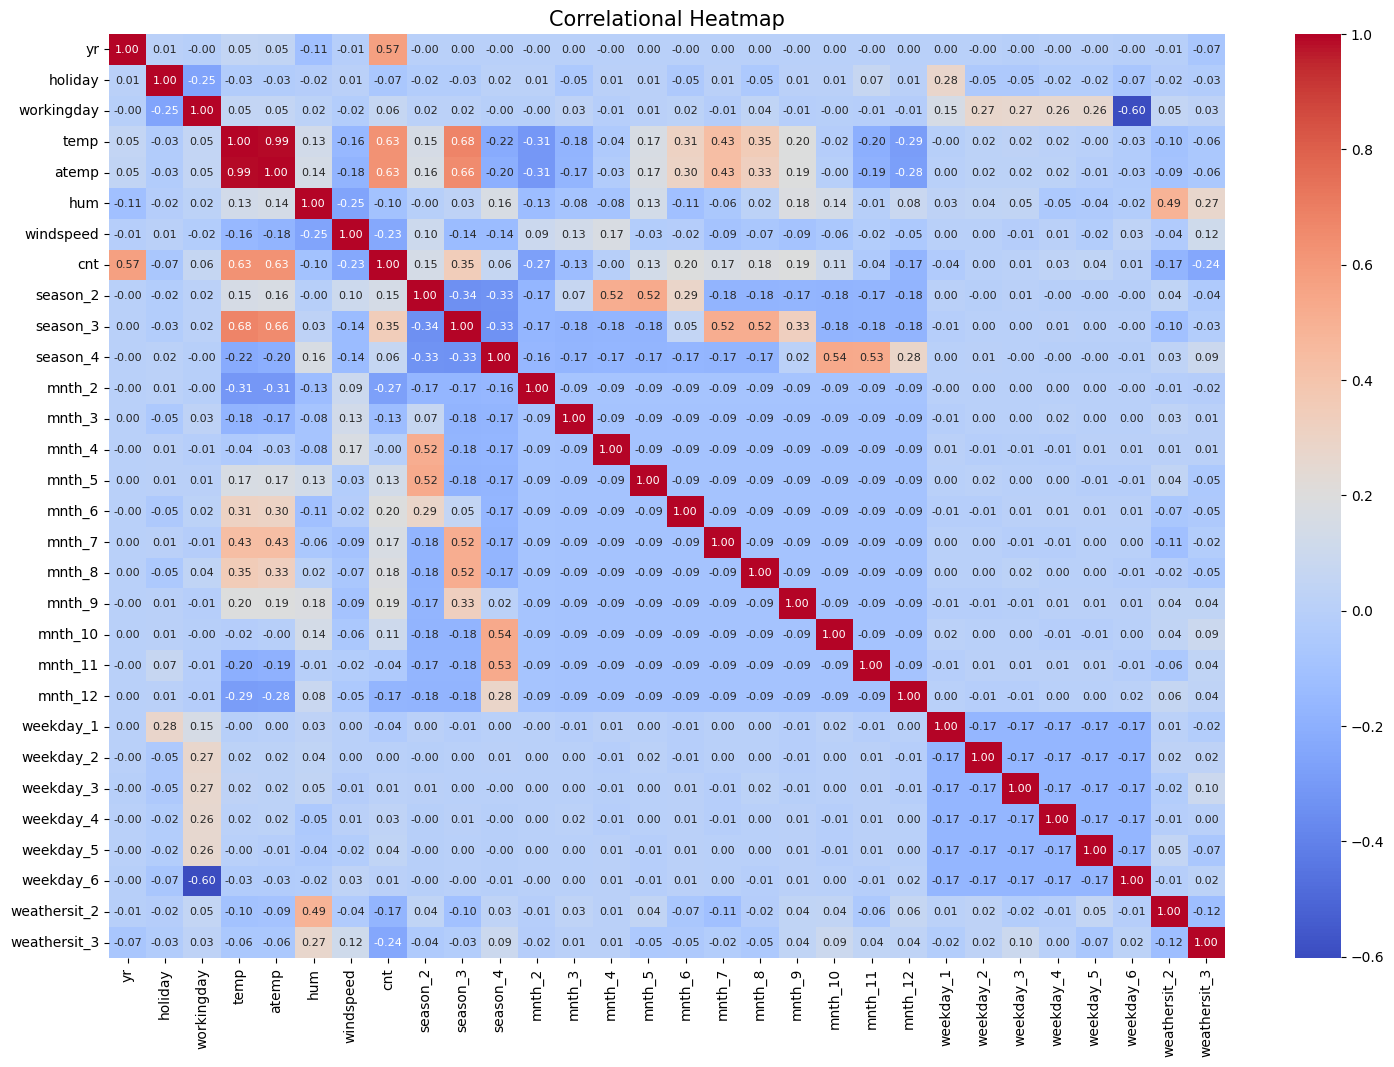

In [17]:
# plot the correlation in heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.title("Correlational Heatmap", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

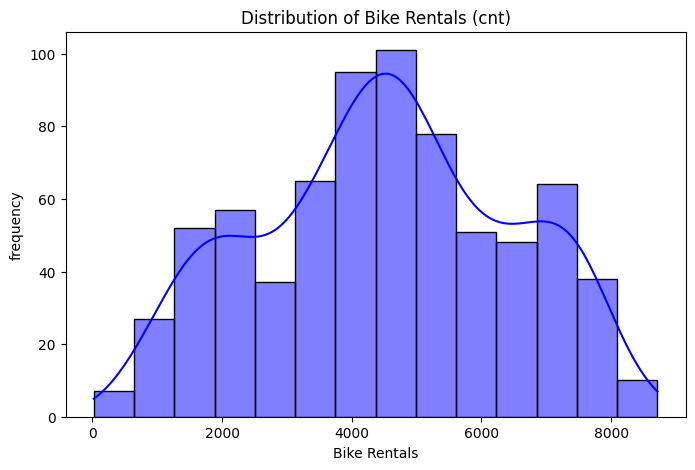

In [18]:
# target value distribution check
plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], kde=True, color='blue')
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Bike Rentals')
plt.ylabel('frequency')
plt.show()

In [19]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=60554da2f978244e3e7af6b07493f8ec48c5a550911460089a7bc4c71f5e6877
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [20]:
# for more analyzing
from ydata_profiling import ProfileReport

pr = ProfileReport(df)
pr.to_file(output_file='output.html')

# The html will be share in github or media platform

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Building

In [21]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mse: {mse} & R2_score: {r2}")

Mse: 495268.45083630475 & R2_score: 0.8798996395587219


In [22]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test,y_pred)
r2_rf = r2_score(y_test,y_pred)

print(f"Mse: {mse} & R2_score: {r2}")

Mse: 495268.45083630475 & R2_score: 0.8798996395587219


In [23]:
# Compare model performance
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [mse, mse_rf],
    "R2 Score": [r2, r2_rf]
}
results_df = pd.DataFrame(results)
print(results_df)

               Model            MSE  R2 Score
0  Linear Regression  495268.450836  0.879900
1      Random Forest  383116.219786  0.907096


In [24]:
# feature_importances_: importance of each feature in making predictions.
rf_model.feature_importances_

array([0.30373425, 0.00429656, 0.00808636, 0.24584581, 0.22561471,
       0.06588063, 0.02796218, 0.00357664, 0.00060405, 0.04717674,
       0.00277448, 0.00433253, 0.00297902, 0.00116637, 0.001545  ,
       0.0005909 , 0.00130418, 0.0060921 , 0.00381743, 0.00175937,
       0.00201804, 0.00196303, 0.00181043, 0.00199315, 0.00335968,
       0.00254664, 0.00538952, 0.00631505, 0.01546517])

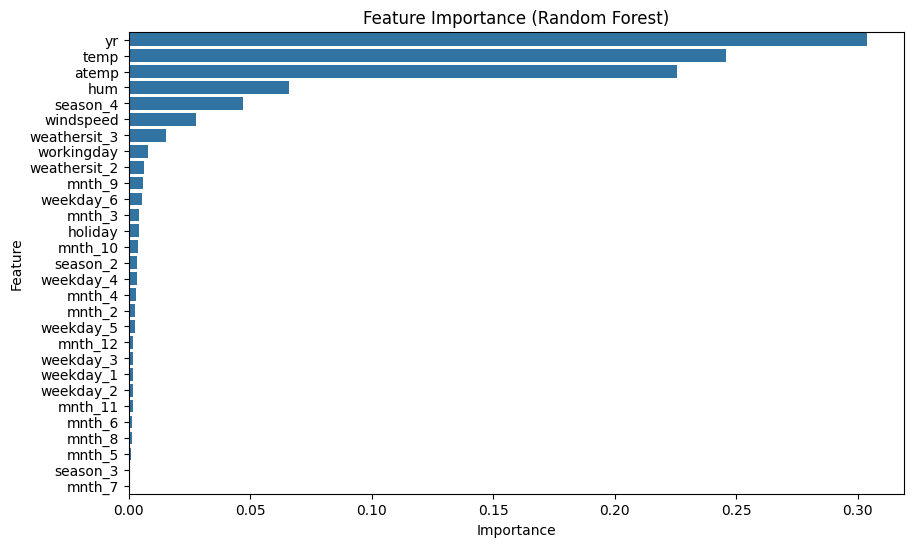

In [25]:
#  Plot feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [26]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, "bike_sharing_rf_model.pkl")

# Load the model later
# loaded_model = joblib.load("bike_sharing_rf_model.pkl")

['bike_sharing_rf_model.pkl']